In [ ]:
# Import necessary libraries

# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessing
from sklearn.utils import resample                      # Sampling methods
from imblearn.over_sampling import SMOTE                # Over sampling
from imblearn.over_sampling import ADASYN               # Over sampling
from sklearn.model_selection import train_test_split    # Splitting datasets

# Feature engineering
import datetime as dt
from sklearn.preprocessing import StandardScaler    # Feature scaling
!pip install category_encoders                      # Install the category_encoders library
from category_encoders import WOEEncoder            # Import the WOEEncoder class from the category_encoders library
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

# Style and color palette for seaborn plots
sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

# Manage warning messages
import warnings
warnings.simplefilter("ignore")     # Ignore all warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Install kaggle

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download datasets from Kaggle

! kaggle datasets download mlg-ulb/creditcardfraud/

 86% 57.0M/66.0M [00:00<00:00, 83.5MB/s]
100% 66.0M/66.0M [00:00<00:00, 91.5MB/s]


In [ ]:
# Unzip dataset zip file

! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
# Load the datasets

# Dataset 2
train_df2 = pd.read_csv('/content/creditcard.csv', index_col='Time')

**Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the train dataset

train_df2.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
# Dataset 2
print("\nTrain Data Info for Dataset 2:")
print(train_df2.info())


Train Data Info for Dataset 2:
<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     28

In [ ]:
# Dataset 2
print("\nShape of Train Dataset 2\n")
print(train_df2.shape)


Shape of Train Dataset 2

(284807, 30)


In [ ]:
# Dataset 2
print("\nMissing values and duplicate values in dataset 2\n")
print(train_df2.isna().sum().sum())
print(train_df2.duplicated().sum())


Missing values and duplicate values in dataset 2

0
9144


In [ ]:
# Define df and copy train_df2 to df
df = train_df2.copy()

# Drop duplicate values from train_df2
train_df2.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
# Calculate the number of frauds in train_df2 before dropping duplicates
frauds_before_drop = len(df[df['Class'] == 1])

# Calculate the number of frauds in train_df2 after dropping duplicates
frauds_after_drop = len(train_df2[train_df2['Class'] == 1])

print("The amount of frauds in train_df2 before dropping duplicates:", frauds_before_drop)
print("The amount of frauds in train_df2 after dropping duplicates:", frauds_after_drop)

The amount of frauds in train_df2 before dropping duplicates: 492
The amount of frauds in train_df2 after dropping duplicates: 473


As we have dropped all the duplicate values, 19 fraudulent transactions are also deleted.

In [ ]:
# Dataset 2
print("\nShape of Train Dataset 2\n")
print(train_df2.shape)


Shape of Train Dataset 2

(275663, 30)


In [ ]:
# Dataset 2
print("\nTrain Data 2 Summary Statistics:\n")
print(train_df2.describe())


Train Data 2 Summary Statistics:

                  V1             V2             V3             V4  \
count  275663.000000  275663.000000  275663.000000  275663.000000   
mean       -0.037460      -0.002430       0.025520      -0.004359   
std         1.952522       1.667260       1.507538       1.424323   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.941105      -0.614040      -0.843168      -0.862847   
50%        -0.059659       0.070249       0.200736      -0.035098   
75%         1.294471       0.819067       1.048461       0.753943   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  275663.000000  275663.000000  275663.000000  275663.000000   
mean       -0.010660      -0.014206       0.008586      -0.005698   
std         1.378117       1.313213       1.240348       1.191596   
min      -113.743307     -26.160506     -43.557242     -73.216718  

In [ ]:
# Dataset 2
print("\nTrain Dataset 2")
is_fraud = train_df2["Class"].value_counts()
print("Fraud: ",is_fraud[1])
print("Legitimate: ",is_fraud[0])


Train Dataset 2
Fraud:  473
Legitimate:  275190



Train Dataset 2



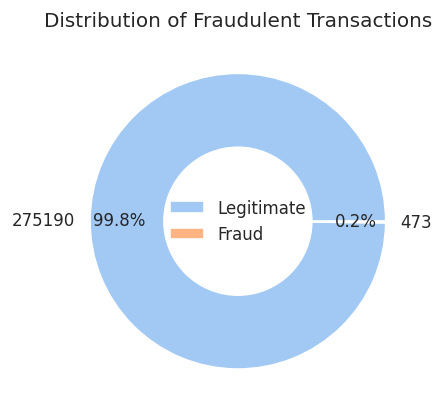

In [ ]:
# Dataset 2
print("\nTrain Dataset 2\n")
donut = train_df2["Class"].value_counts().reset_index()

labels = ["Legitimate", "Fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Fraudulent Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

In [ ]:
train_df2.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.009002,0.005952,-0.000042,-0.018593,-0.005789,-0.006843,-0.000490,-0.007093,0.003115,...,0.006004,0.003634,-0.007504,-0.009327,-0.004446,-0.002436,-0.014628,-0.003555,-0.225854,-0.094718
V2,0.009002,1.000000,0.004976,-0.004095,0.004655,0.004290,0.004866,0.003743,0.001116,0.002764,...,-0.003881,0.002909,-0.003689,0.001974,-0.002837,-0.000296,0.007252,0.001458,-0.534153,0.084754
V3,0.005952,0.004976,1.000000,-0.000721,0.011020,0.014780,-0.014016,0.003733,-0.002896,-0.011064,...,0.001818,-0.004203,0.002183,0.009782,0.004091,0.003596,-0.008780,-0.002454,-0.220547,-0.185772
V4,-0.000042,-0.004095,-0.000721,1.000000,0.006710,0.012535,0.000806,0.004996,0.001395,0.003366,...,-0.000623,0.001581,-0.000155,0.005759,0.000173,-0.001105,0.002517,0.000028,0.100626,0.130313
V5,-0.018593,0.004655,0.011020,0.006710,1.000000,-0.029701,-0.009107,-0.002605,-0.000786,-0.002818,...,0.003439,0.002971,-0.001058,-0.012634,-0.004862,-0.001568,-0.006116,-0.000711,-0.390280,-0.088642
V6,-0.005789,0.004290,0.014780,0.012535,-0.029701,1.000000,0.013087,-0.012301,-0.002290,-0.002723,...,-0.001584,0.002355,-0.000221,-0.021098,-0.006673,0.000702,-0.001577,0.000617,0.224967,-0.044777
V7,-0.006843,0.004866,-0.014016,0.000806,-0.009107,0.013087,1.000000,-0.000987,-0.001657,-0.012246,...,0.008635,-0.001701,0.003458,0.005375,0.002070,-0.000459,-0.003977,0.001329,0.401573,-0.173292
V8,-0.000490,0.003743,0.003733,0.004996,-0.002605,-0.012301,-0.000987,1.000000,0.000168,0.000239,...,0.018806,-0.005182,0.006461,-0.006000,-0.002827,-0.001122,-0.000108,0.000201,-0.104572,0.033364
V9,-0.007093,0.001116,-0.002896,0.001395,-0.000786,-0.002290,-0.001657,0.000168,1.000000,-0.004957,...,0.001744,0.000742,-0.001739,-0.002454,-0.000358,0.005307,0.008066,0.006487,-0.041446,-0.094583
V10,0.003115,0.002764,-0.011064,0.003366,-0.002818,-0.002723,-0.012246,0.000239,-0.004957,1.000000,...,0.002396,-0.003012,0.001760,0.001015,0.002499,-0.000859,0.011495,0.009956,-0.104586,-0.208104


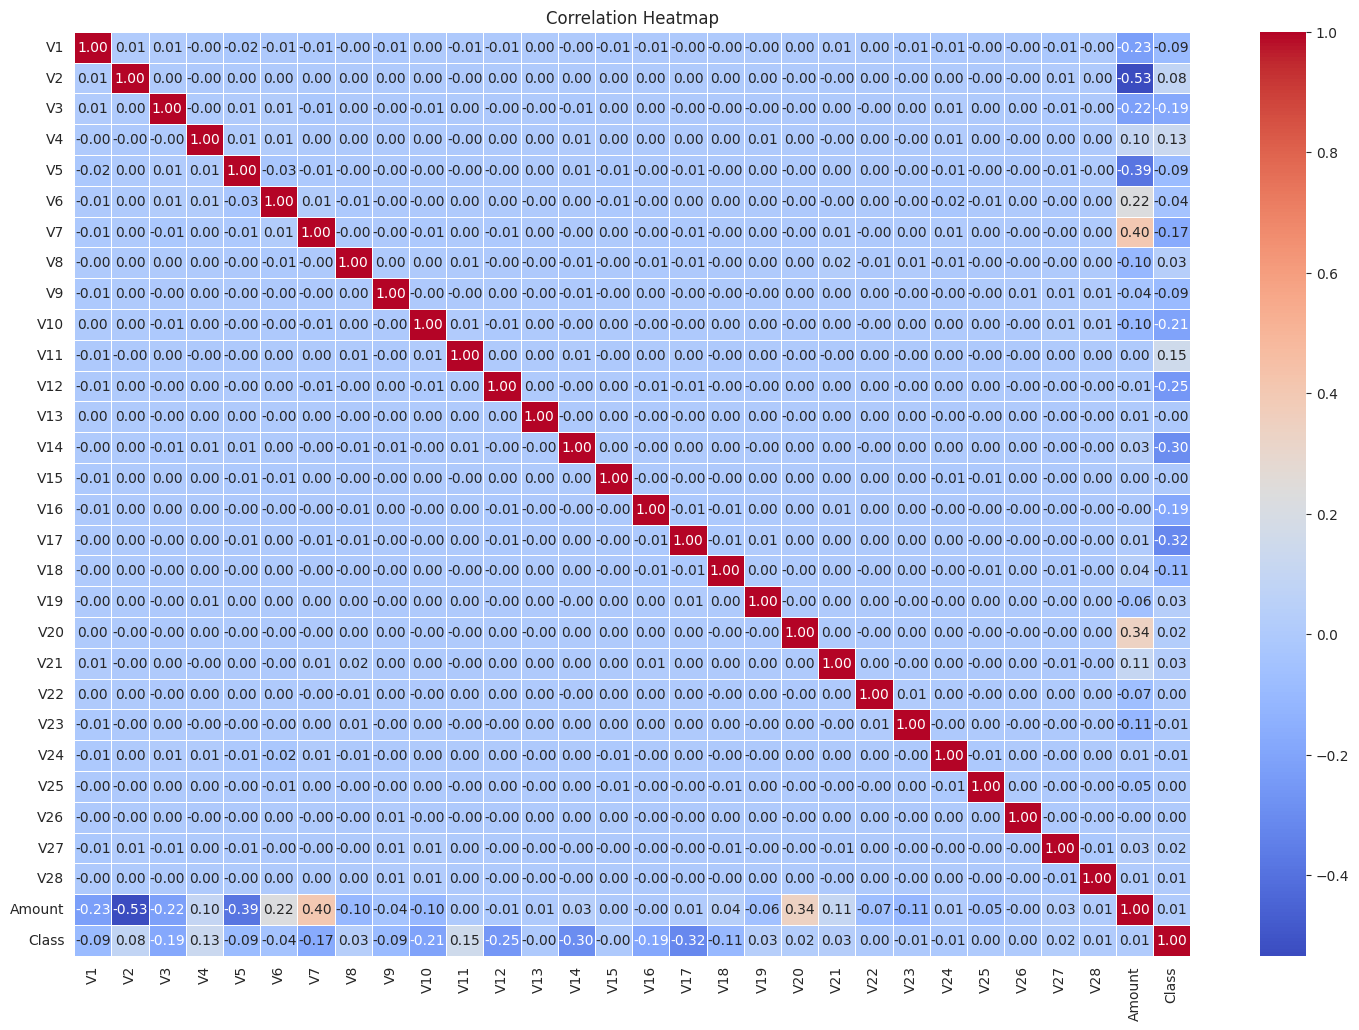

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(train_df2.corr(),annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

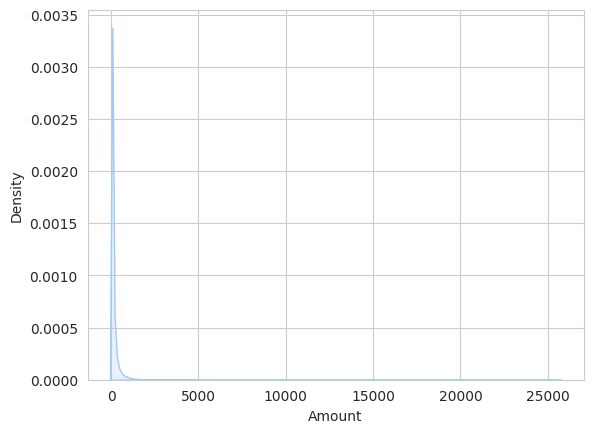

In [ ]:
sns.kdeplot(train_df2["Amount"], fill=True);

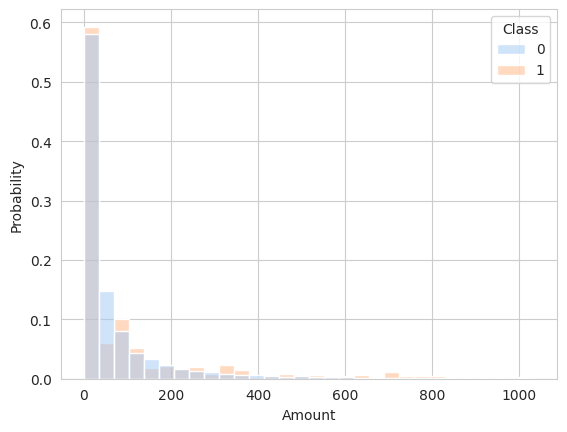

In [ ]:
pct99 = train_df2["Amount"].quantile(0.99)
sns.histplot(x="Amount", hue="Class", bins=30,
             stat="probability", data=train_df2[train_df2["Amount"] <= pct99],
             common_norm=False);

**FEATURE ENGINEERING**

**Convert 'Time' to hours for better visualization**

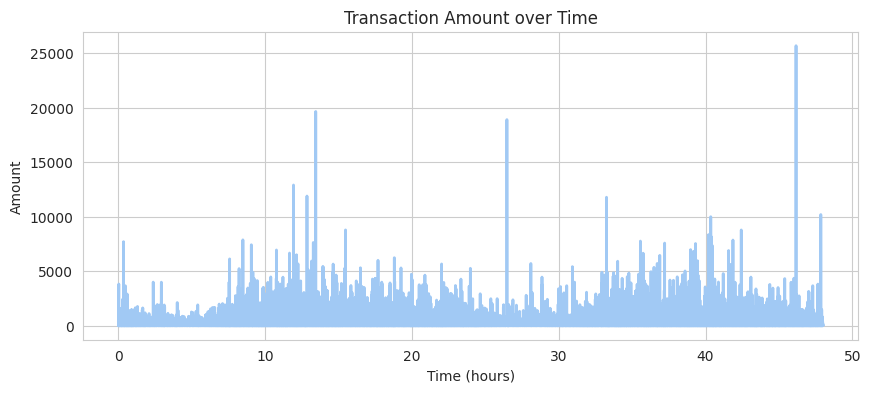

In [ ]:
# Reset index to ensure 'Time' is treated as a regular column
train_df2 = train_df2.reset_index()

# Convert 'Time' to hours for better visualization
train_df2['TimeHours'] = train_df2['Time'] / 3600

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(train_df2['TimeHours'], train_df2['Amount'], linewidth=2)
plt.title('Transaction Amount over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [ ]:
# Get the bottom 5 rows
train_df2['TimeHours'].tail()

275658    47.996111
275659    47.996389
275660    47.996667
275661    47.996667
275662    47.997778
Name: TimeHours, dtype: float64

Based on the provided outputs, it's evident that the transactions data were collected over a period of approximately 48 hours.

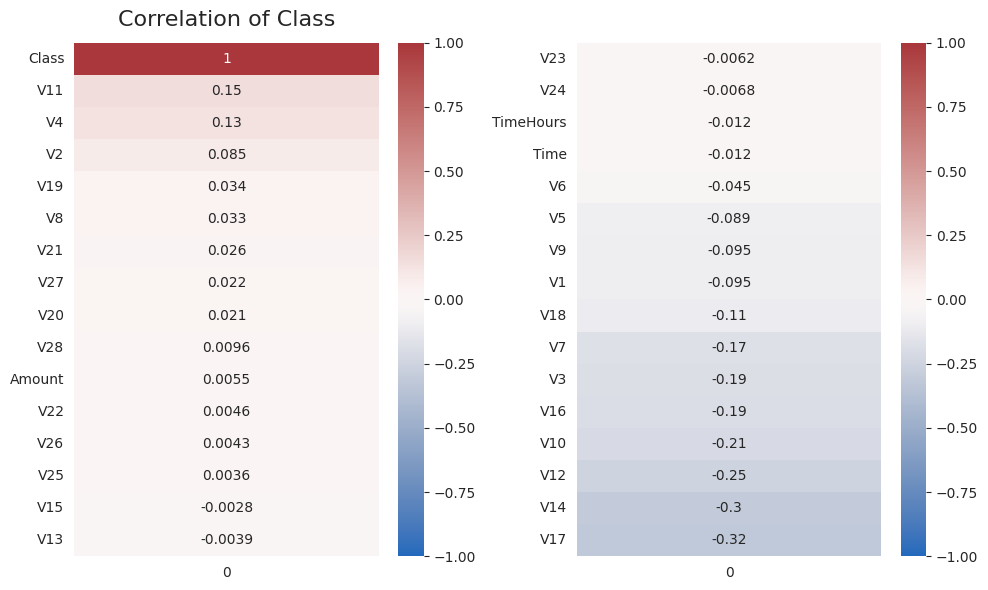

In [ ]:
# Calculate correlation matrix
correlation_matrix = train_df2.corrwith(train_df2['Class']).sort_values(ascending=False)

# Split correlation matrix into two halves
half_length = len(correlation_matrix) // 2
first_half = correlation_matrix[:half_length]
second_half = correlation_matrix[half_length:]

# Set up the plots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the heatmap for the first half
heatmap1 = sns.heatmap(first_half.to_frame(), vmin=-1, vmax=1, annot=True, cmap='vlag', ax=axs[0])
heatmap1.set_title('Correlation of Class', fontdict={'fontsize': 16}, pad=12)

# Plot the heatmap for the second half
heatmap2 = sns.heatmap(second_half.to_frame(), vmin=-1, vmax=1, annot=True, cmap='vlag', ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.show()

In pursuit of optimizing the model, features with correlation values within the range of [-0.1, 0.1] will be excluded during feature selection.

In [ ]:
# Feature Selection
train_df2 = train_df2[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
train_df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


In [ ]:
# Separate features and labels

X_train2 = train_df2.drop('Class', axis=1)
y_train2 = train_df2['Class']

In [ ]:
# Spliting the dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=65)

**Case 1: Undersampling**

In [ ]:
# Combined features and labels for train data for undersampling
combined_train_df2 = pd.concat([X_train2, y_train2], axis=1)

In [ ]:
# Separate majority and minority classes for train dataset
majority_class = combined_train_df2[combined_train_df2['Class'] == 0]
minority_class = combined_train_df2[combined_train_df2['Class'] == 1]

# Downsample majority class
downsampled_majority = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled_train_data = pd.concat([downsampled_majority, minority_class])

In [ ]:
# Separate features and labels again
X_train2_downsampled = downsampled_train_data.drop('Class', axis=1)
y_train2_downsampled = downsampled_train_data['Class']

In [ ]:
scaler = StandardScaler()
X_train2_downsampled_scaled = scaler.fit_transform(X_train2_downsampled)
X_test2_scaled = scaler.transform(X_test2)

In [ ]:
# checking newly created data
print('Current length of the training set: ', len(y_train2_downsampled))

Current length of the training set:  824


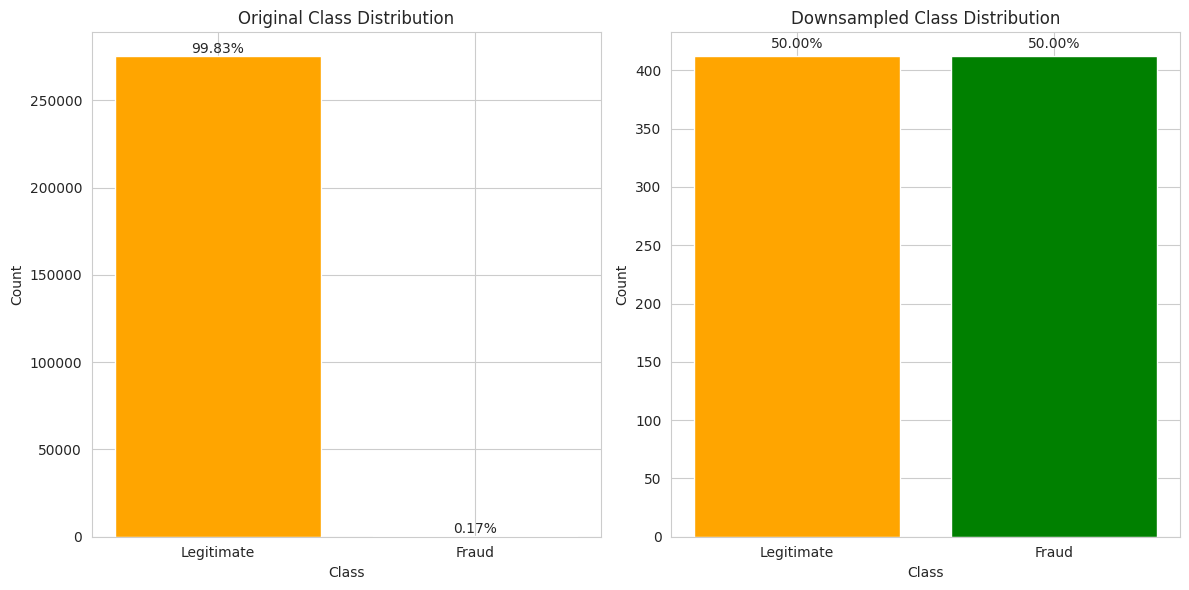

In [ ]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df2["Class"].value_counts()

# Count the occurrences of each class in the oversampled dataset
downsampled_class_counts = y_train2_downsampled.value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df2) * 100
downsampled_percentages = downsampled_class_counts / len(y_train2_downsampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

**[1] Logistic Regression -> LR**

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train2_downsampled_scaled, y_train2_downsampled)
predict_LR = LR_model.predict(X_test2_scaled)
print(classification_report(y_test2, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test2)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test2, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     55072
           1       0.04      0.90      0.07        61

    accuracy                           0.97     55133
   macro avg       0.52      0.94      0.53     55133
weighted avg       1.00      0.97      0.99     55133

Logistic Regression accuracy is: 97.46%
AUC for Logistic Regression: 0.96


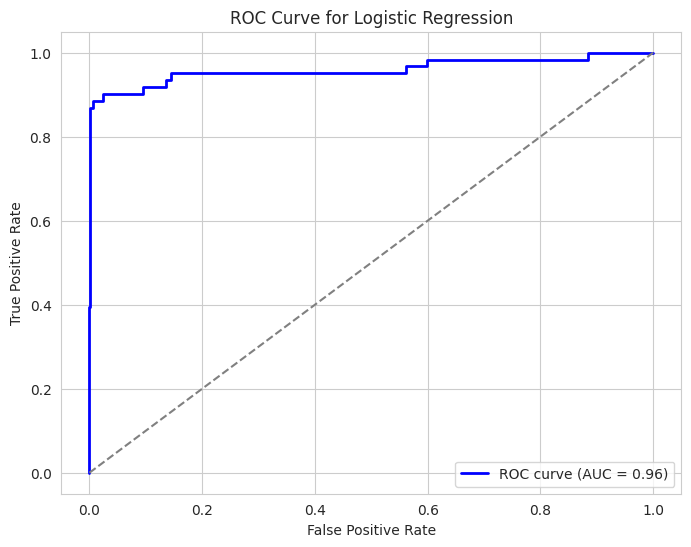

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

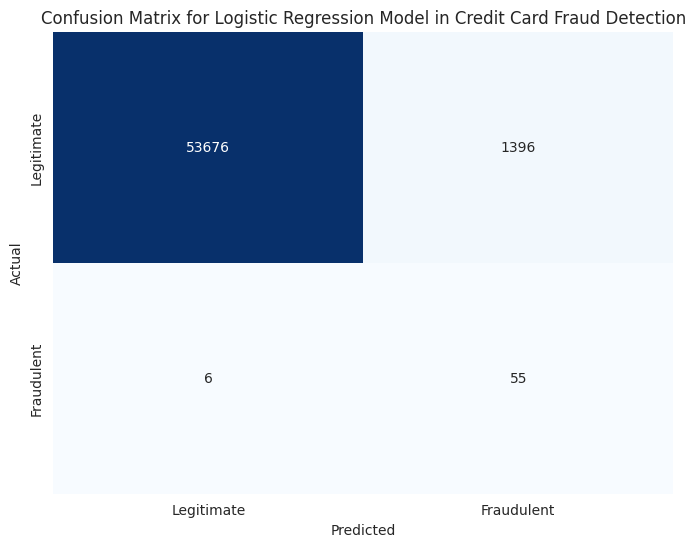

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.037905
1     Recall  0.901639
2   F1-Score  0.072751
3   Accuracy  0.974571
4        AUC  0.959570


**[2] Decision Tree Model (ID3)**

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train2_downsampled_scaled, y_train2_downsampled)
predict_DT = DT_model.predict(X_test2_scaled)
print(classification_report(y_test2, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test2)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test2, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55072
           1       0.03      0.90      0.05        61

    accuracy                           0.96     55133
   macro avg       0.51      0.93      0.52     55133
weighted avg       1.00      0.96      0.98     55133

Decision Tree model accuracy is: 96.27%
AUC for Decision Tree Classifier: 0.93


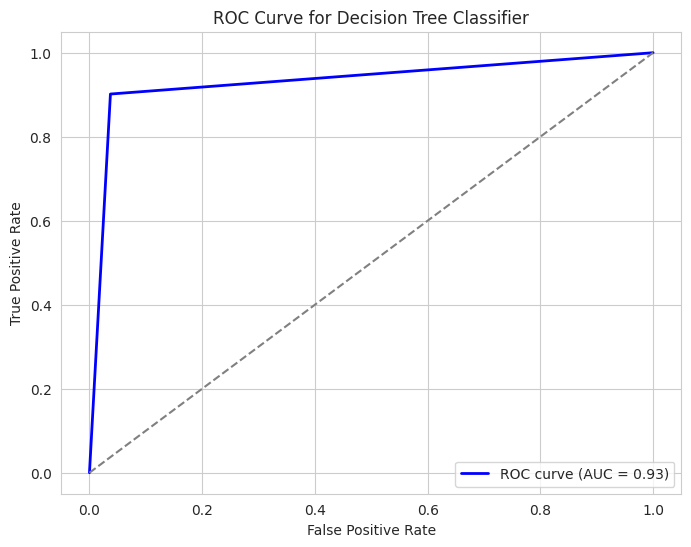

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

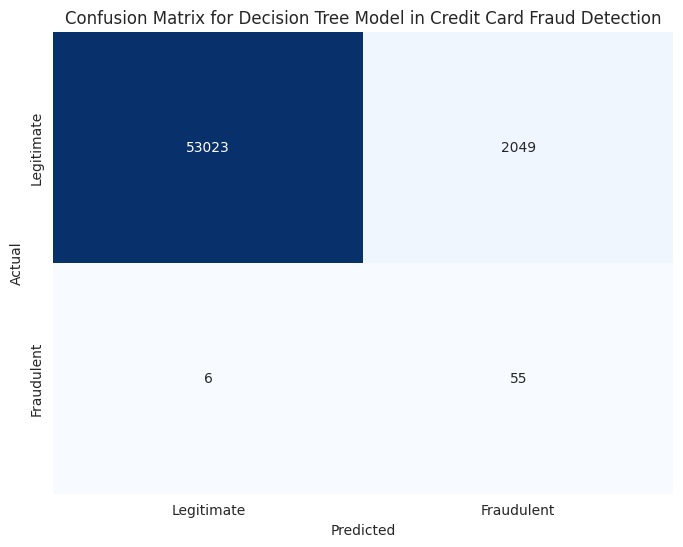

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.026141
1     Recall  0.901639
2   F1-Score  0.050808
3   Accuracy  0.962726
4        AUC  0.932217


**[3] XGB Classifier**

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train2_downsampled_scaled, y_train2_downsampled)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test2_scaled)

# Evaluate the model
print(classification_report(y_test2, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test2)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test2, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55072
           1       0.02      0.92      0.04        61

    accuracy                           0.96     55133
   macro avg       0.51      0.94      0.51     55133
weighted avg       1.00      0.96      0.98     55133

XGBoost model accuracy is: 95.64%
AUC for XGBoost classifier: 0.98


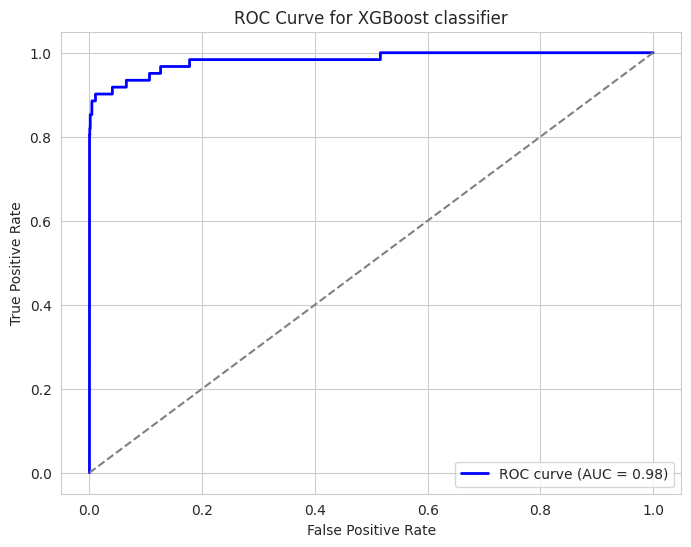

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

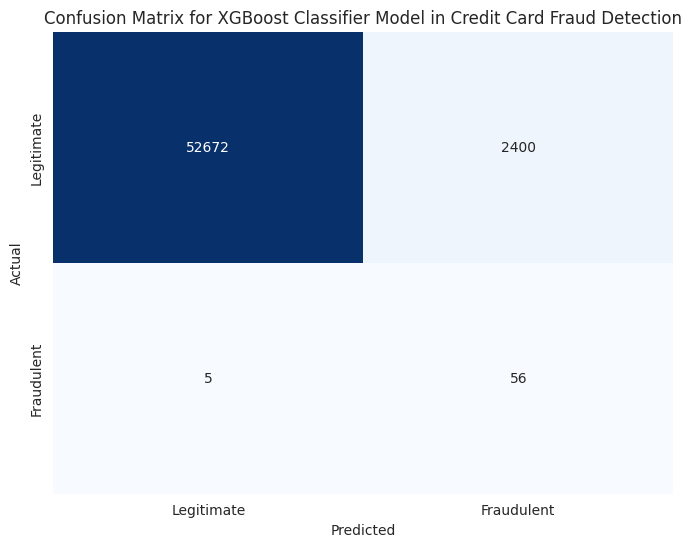

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.022801
1     Recall  0.918033
2   F1-Score  0.044497
3   Accuracy  0.956378
4        AUC  0.982657


**[4] Random Forest Classifier**

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train2_downsampled_scaled, y_train2_downsampled)

predict_RF = RF_model.predict(X_test2_scaled)

# Evaluate the model
print(classification_report(y_test2, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test2)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test2, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     55072
           1       0.03      0.90      0.05        61

    accuracy                           0.96     55133
   macro avg       0.51      0.93      0.52     55133
weighted avg       1.00      0.96      0.98     55133

Random Forest model accuracy is: 96.48%
AUC for Random Forest classifier: 0.98


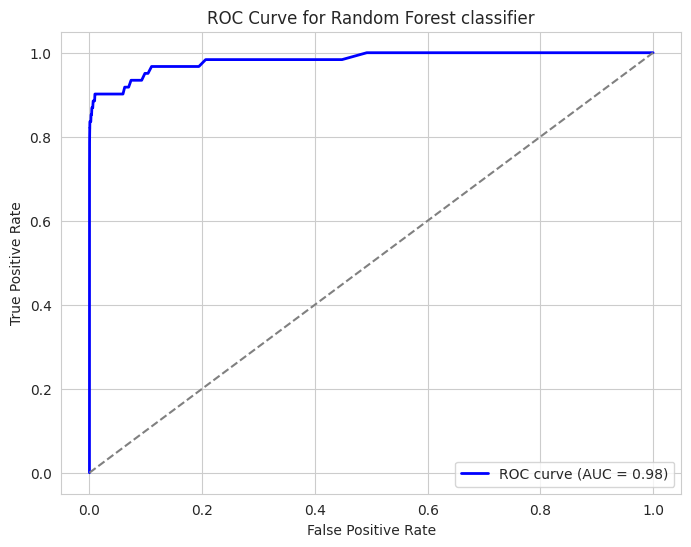

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

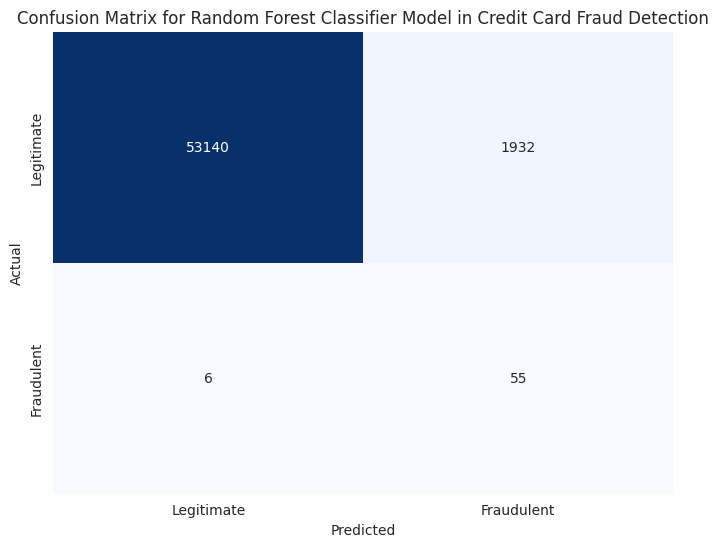

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.027680
1     Recall  0.901639
2   F1-Score  0.053711
3   Accuracy  0.964849
4        AUC  0.983087


**[5] K-Nearest Neighbors (KNN) Model**

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train2_downsampled_scaled, y_train2_downsampled)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test2_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test2, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test2)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test2, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55072
           1       0.04      0.90      0.08        61

    accuracy                           0.98     55133
   macro avg       0.52      0.94      0.53     55133
weighted avg       1.00      0.98      0.99     55133

K-Nearest Neighbors (KNN) accuracy is: 97.56%
AUC for K-Nearest Neighbors (KNN): 0.96


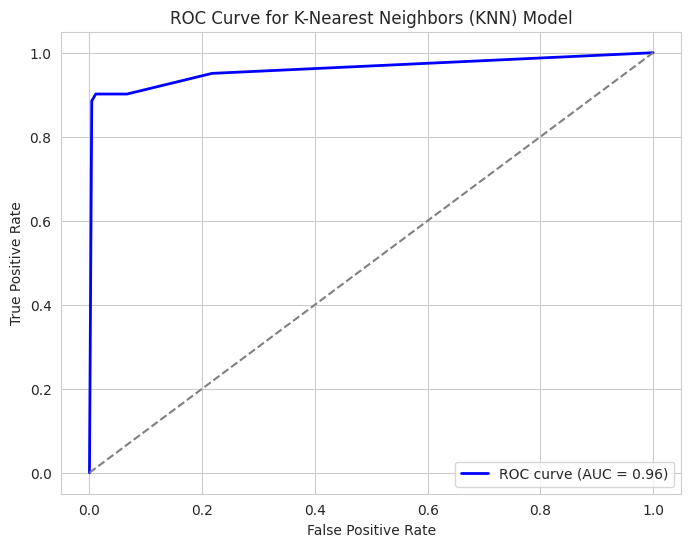

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

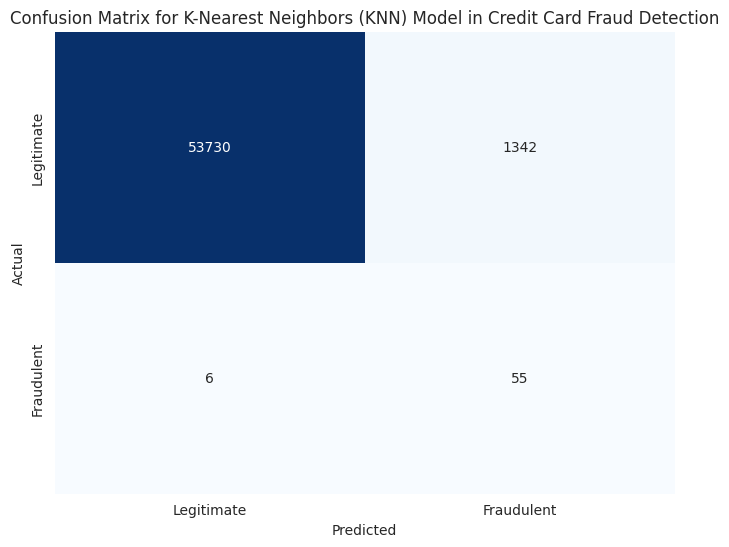

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.039370
1     Recall  0.901639
2   F1-Score  0.075446
3   Accuracy  0.975550
4        AUC  0.961144


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test2, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test2, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test2, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test2, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test2, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 2 with Undersampling:")
print(metrics_df_undersampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 2 with Undersampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.04   0.90     0.07     0.97  0.96
1          Decision Tree      0.03   0.90     0.05     0.96  0.93
2         XGB Classifier      0.02   0.92     0.04     0.96  0.98
3          Random Forest      0.03   0.90     0.05     0.96  0.98
4  KNeighbors Classifier      0.04   0.90     0.08     0.98  0.96


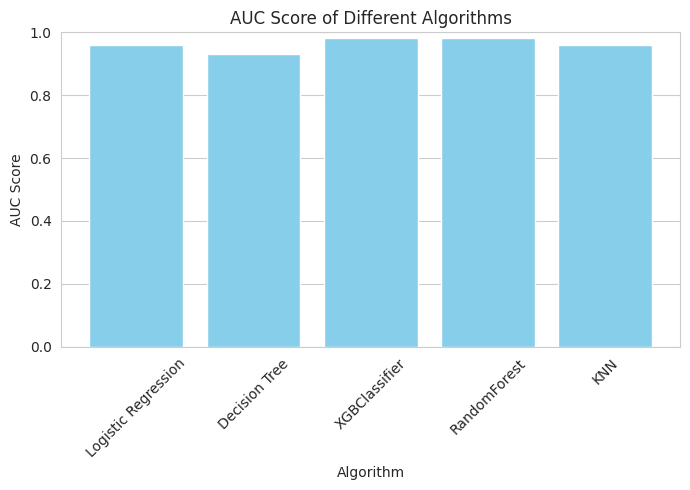

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Case 1: SMOTE Oversampling**

In [ ]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train2_SMOTE, y_train2_SMOTE = smote.fit_resample(X_train2, y_train2)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train2_SMOTE_scaled = scaler.fit_transform(X_train2_SMOTE)
X_test2_scaled = scaler.transform(X_test2)

In [ ]:
print("\nShape of Train Dataset 2\n")
print(X_train2_SMOTE.shape)


Shape of Train Dataset 2

(440236, 9)


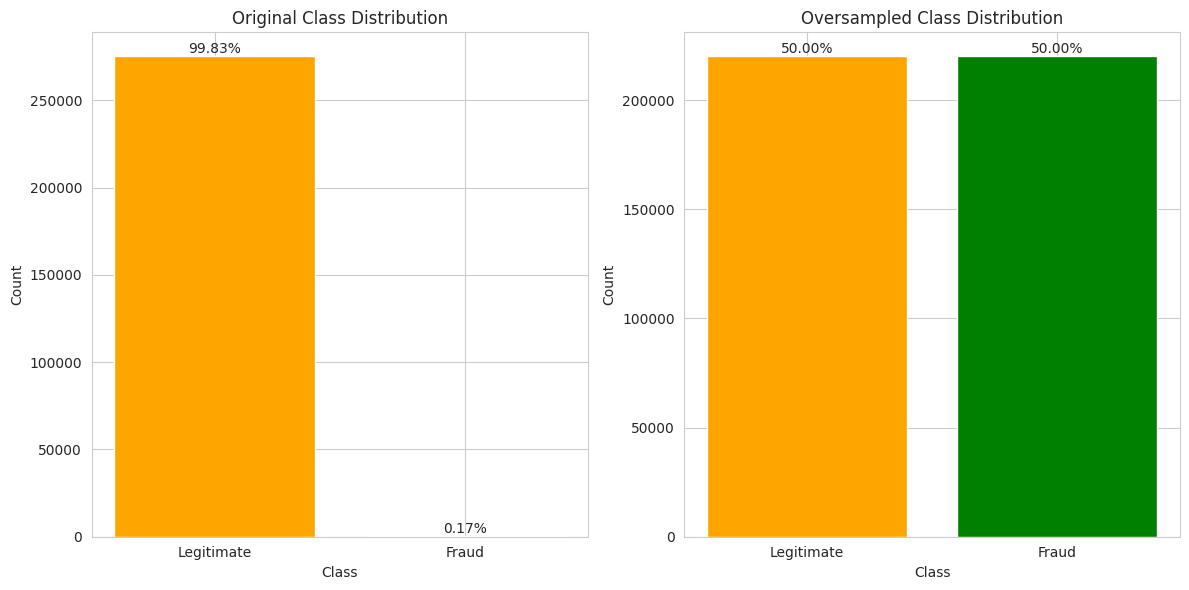

In [ ]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df2["Class"].value_counts()

# Count the occurrences of each class in the downsampled dataset
oversampled_class_counts = y_train2_SMOTE.value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df2) * 100
oversampled_percentages = oversampled_class_counts / len(y_train2_SMOTE) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(oversampled_class_counts.index, oversampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, oversampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Oversampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(oversampled_class_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train2_SMOTE_scaled, y_train2_SMOTE)
predict_LR = LR_model.predict(X_test2_scaled)
print(classification_report(y_test2, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test2)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test2, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     55072
           1       0.04      0.90      0.07        61

    accuracy                           0.97     55133
   macro avg       0.52      0.94      0.53     55133
weighted avg       1.00      0.97      0.99     55133

Logistic Regression accuracy is: 97.31%
AUC for Logistic Regression: 0.96


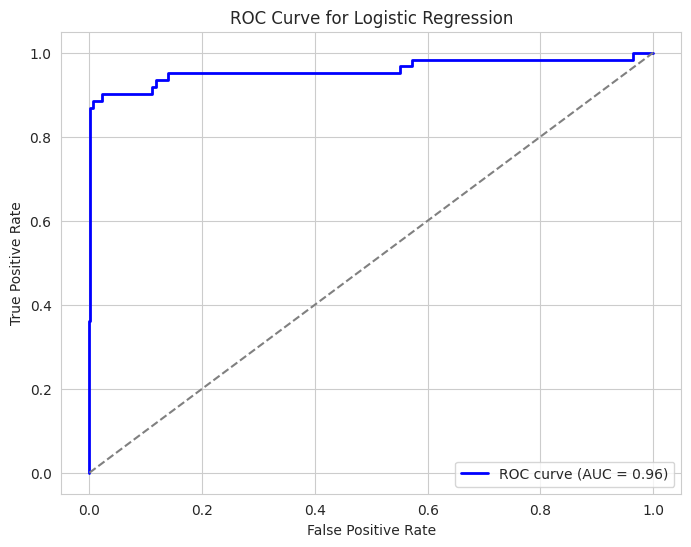

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

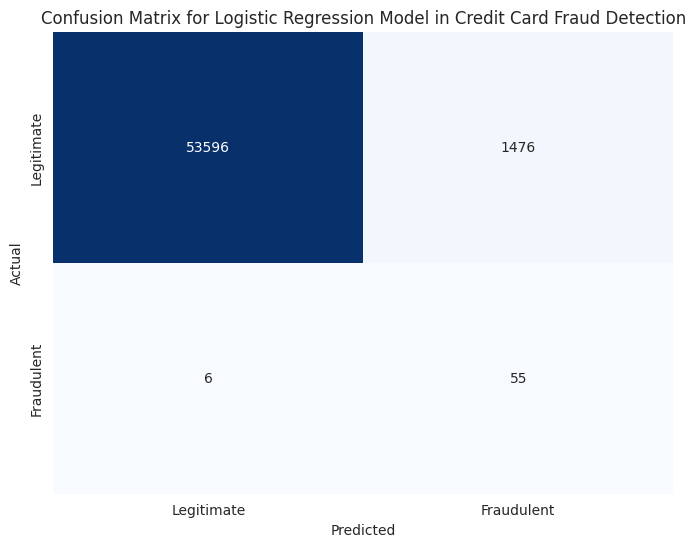

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.035924
1     Recall  0.901639
2   F1-Score  0.069095
3   Accuracy  0.973120
4        AUC  0.959074


In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train2_SMOTE_scaled, y_train2_SMOTE)
predict_DT = DT_model.predict(X_test2_scaled)
print(classification_report(y_test2, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test2)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test2, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     55072
           1       0.03      0.89      0.07        61

    accuracy                           0.97     55133
   macro avg       0.52      0.93      0.53     55133
weighted avg       1.00      0.97      0.98     55133

Decision Tree model accuracy is: 97.18%
AUC for Decision Tree Classifier: 0.93


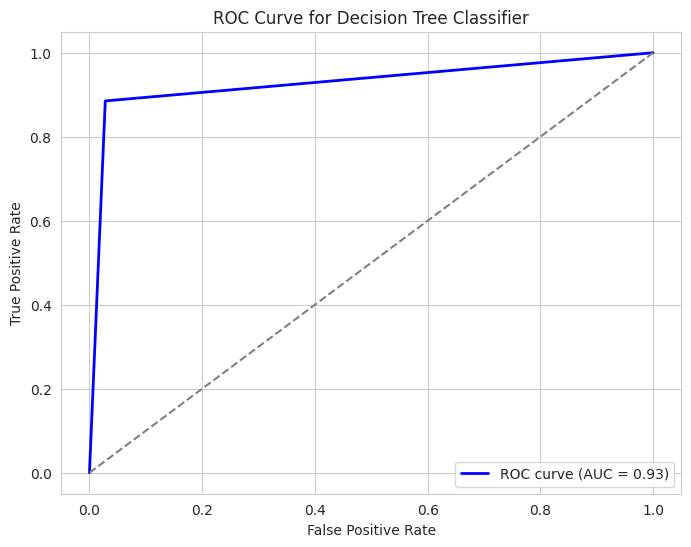

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

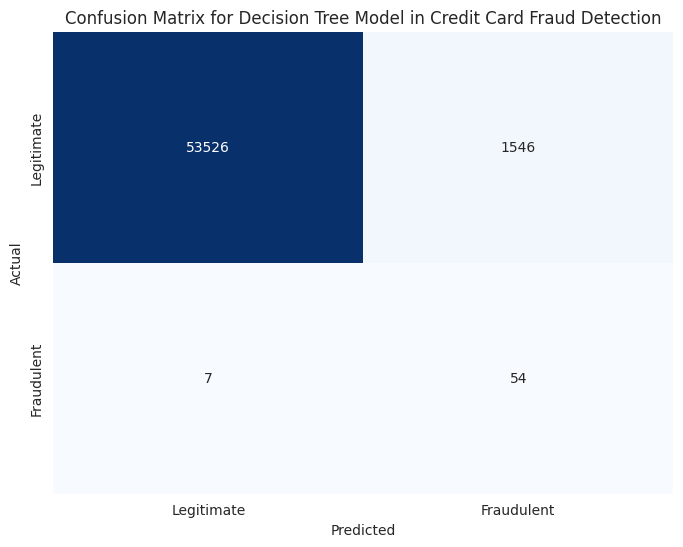

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.033750
1     Recall  0.885246
2   F1-Score  0.065021
3   Accuracy  0.971832
4        AUC  0.928587


In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train2_SMOTE_scaled, y_train2_SMOTE)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test2_scaled)

# Evaluate the model
print(classification_report(y_test2, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test2)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test2, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55072
           1       0.26      0.84      0.40        61

    accuracy                           1.00     55133
   macro avg       0.63      0.92      0.70     55133
weighted avg       1.00      1.00      1.00     55133

XGBoost model accuracy is: 99.72%
AUC for XGBoost classifier: 0.94


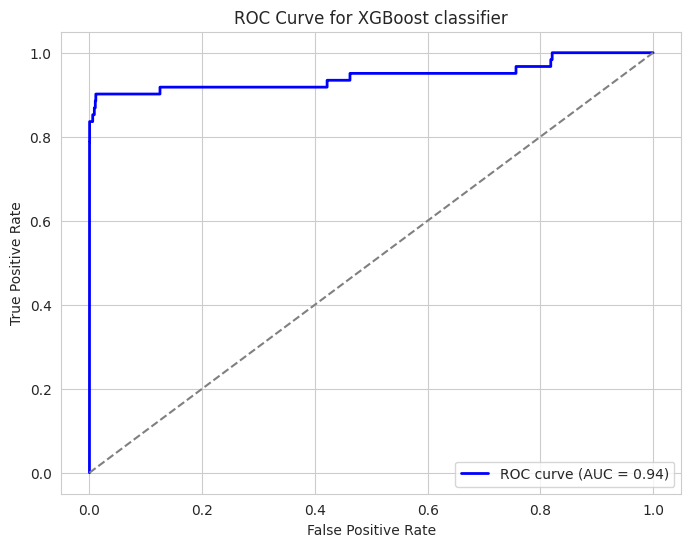

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

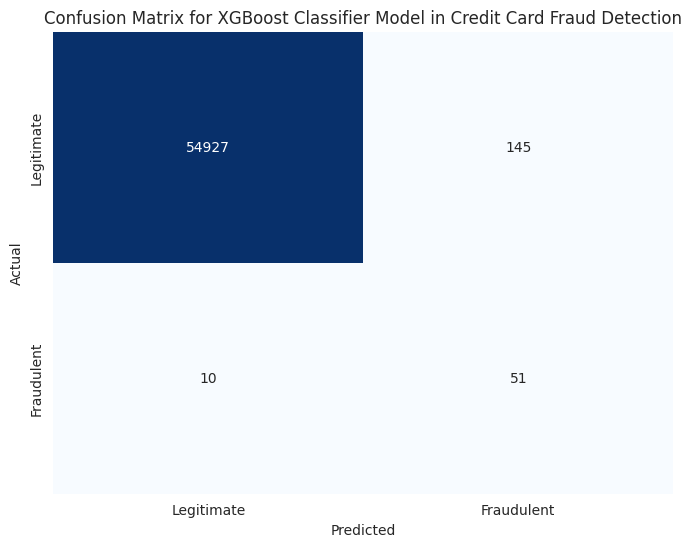

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.260204
1     Recall  0.836066
2   F1-Score  0.396887
3   Accuracy  0.997189
4        AUC  0.943568


In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train2_SMOTE_scaled, y_train2_SMOTE)

predict_RF = RF_model.predict(X_test2_scaled)

# Evaluate the model
print(classification_report(y_test2, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test2)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test2, y_probs_RF)

print('AUC for Random Forest: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55072
           1       0.54      0.82      0.65        61

    accuracy                           1.00     55133
   macro avg       0.77      0.91      0.83     55133
weighted avg       1.00      1.00      1.00     55133

Random Forest model accuracy is: 99.90%
AUC for Random Forest: 0.96


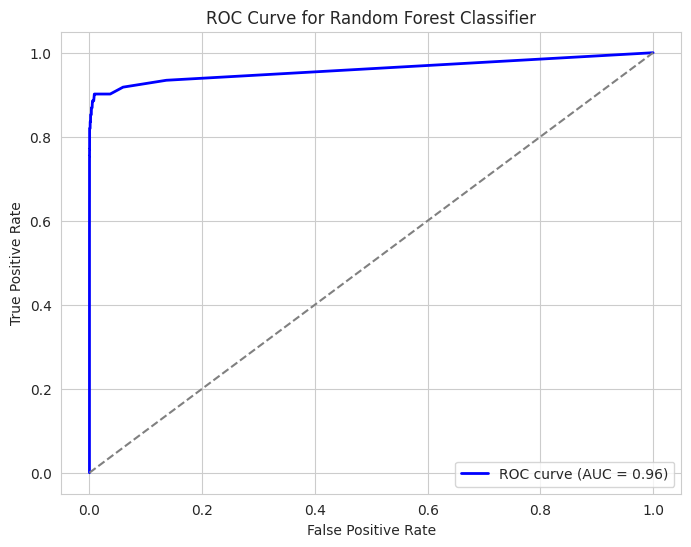

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

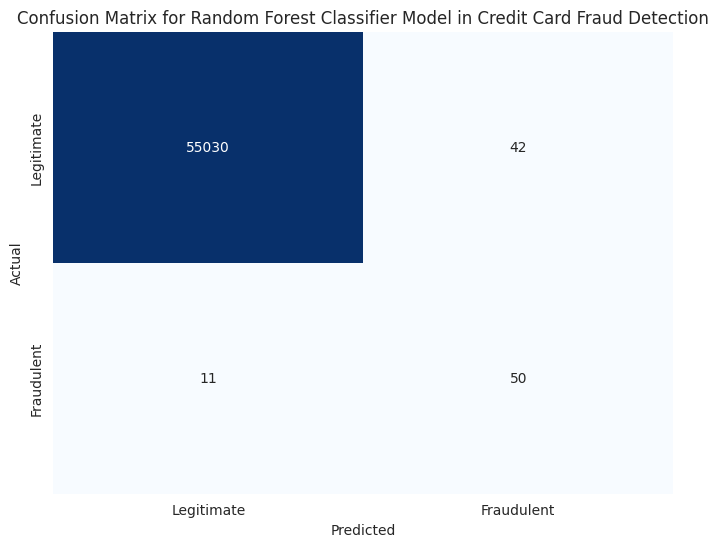

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.543478
1     Recall  0.819672
2   F1-Score  0.653595
3   Accuracy  0.999039
4        AUC  0.959986


In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train2_SMOTE_scaled, y_train2_SMOTE)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test2_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test2, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test2)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test2, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55072
           1       0.20      0.87      0.33        61

    accuracy                           1.00     55133
   macro avg       0.60      0.93      0.66     55133
weighted avg       1.00      1.00      1.00     55133

K-Nearest Neighbors (KNN) accuracy is: 99.61%
AUC for K-Nearest Neighbors (KNN): 0.94


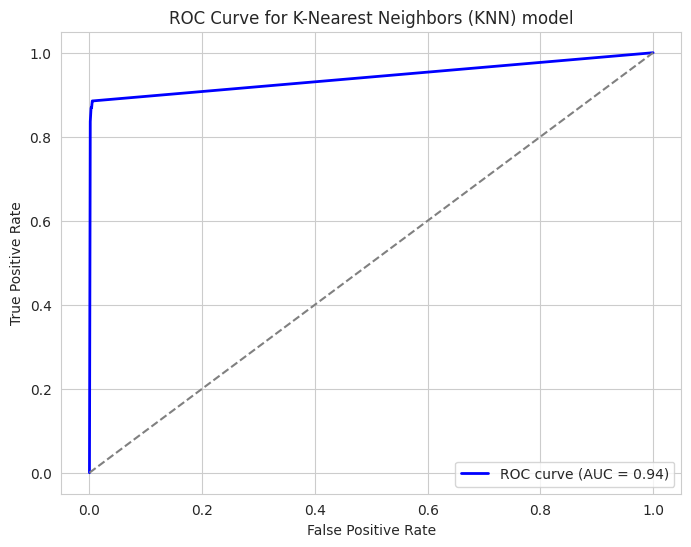

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

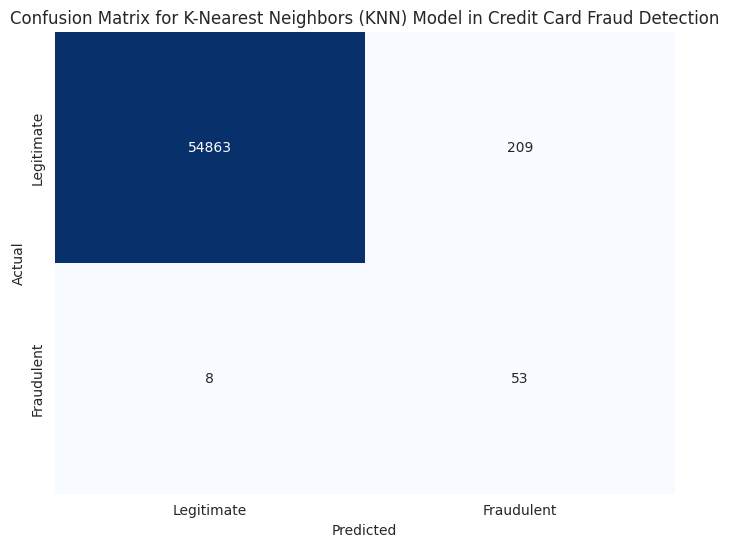

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.202290
1     Recall  0.868852
2   F1-Score  0.328173
3   Accuracy  0.996064
4        AUC  0.941542


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test2, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test2, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test2, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test2, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test2, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_smote_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 2 with SMOTE Oversampling:")
print(metrics_df_smote_oversampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 2 with SMOTE Oversampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.04   0.90     0.07     0.97  0.96
1          Decision Tree      0.03   0.89     0.07     0.97  0.93
2         XGB Classifier      0.26   0.84     0.40     1.00  0.94
3          Random Forest      0.54   0.82     0.65     1.00  0.96
4  KNeighbors Classifier      0.20   0.87     0.33     1.00  0.94


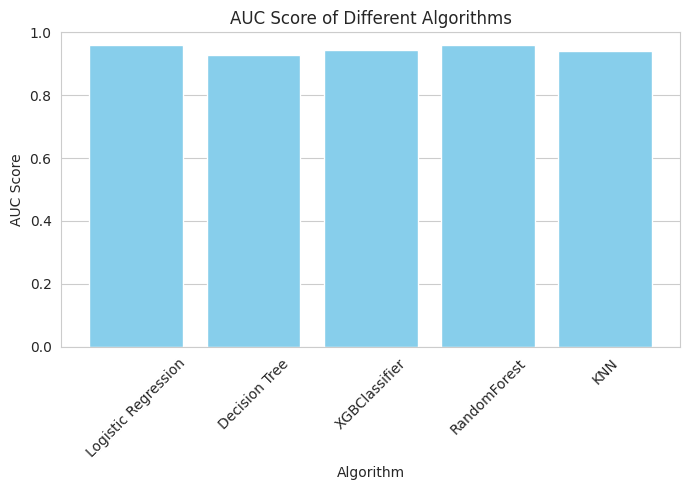

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Case 2: ADASYN Oversampling**

In [ ]:
# Initialize the ADASYN object
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the training data
X_train2_ADASYN, y_train2_ADASYN = adasyn.fit_resample(X_train2, y_train2)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train2_ADASYN_scaled = scaler.fit_transform(X_train2_ADASYN)
X_test2_scaled = scaler.transform(X_test2)

In [ ]:
print("\nShape of Train Dataset 2\n")
print(X_train2_ADASYN.shape)


Shape of Train Dataset 2

(440193, 9)


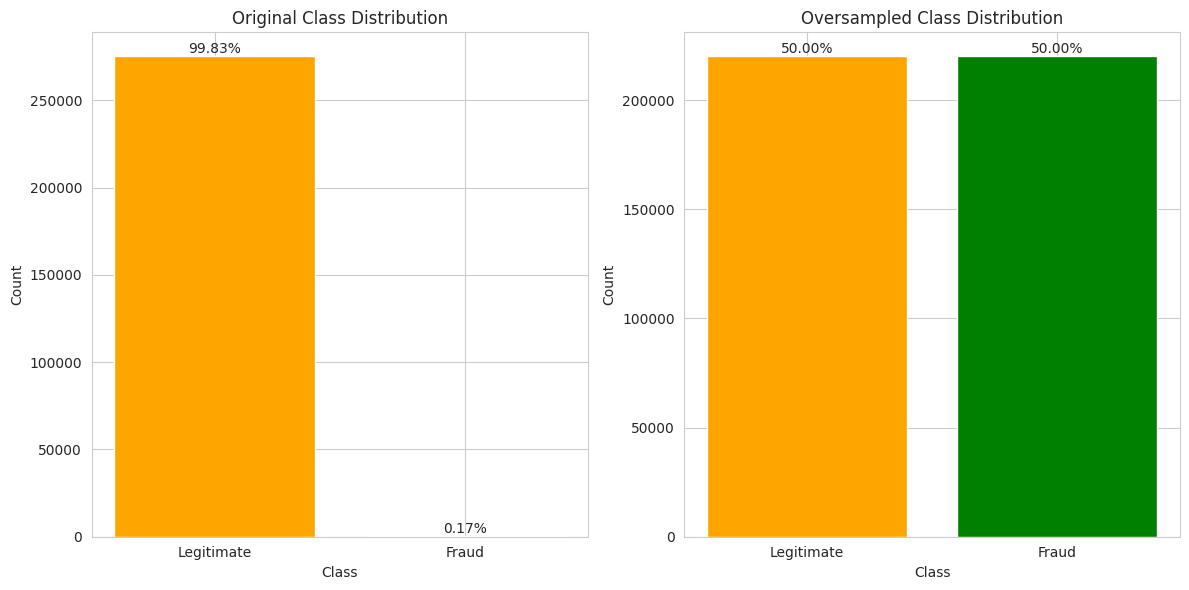

In [ ]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df2["Class"].value_counts()

# Count the occurrences of each class in the downsampled dataset
oversampled_class_counts = y_train2_ADASYN.value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df2) * 100
oversampled_percentages = oversampled_class_counts / len(y_train2_ADASYN) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Legitimate', 'Fraud'])

# Bar chart for oversampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(oversampled_class_counts.index, oversampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, oversampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Oversampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(oversampled_class_counts.index, ['Legitimate', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train2_ADASYN_scaled, y_train2_ADASYN)
predict_LR = LR_model.predict(X_test2_scaled)
print(classification_report(y_test2, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test2)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test2, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     55072
           1       0.01      0.92      0.02        61

    accuracy                           0.88     55133
   macro avg       0.50      0.90      0.48     55133
weighted avg       1.00      0.88      0.94     55133

Logistic Regression accuracy is: 88.31%
AUC for Logistic Regression: 0.96


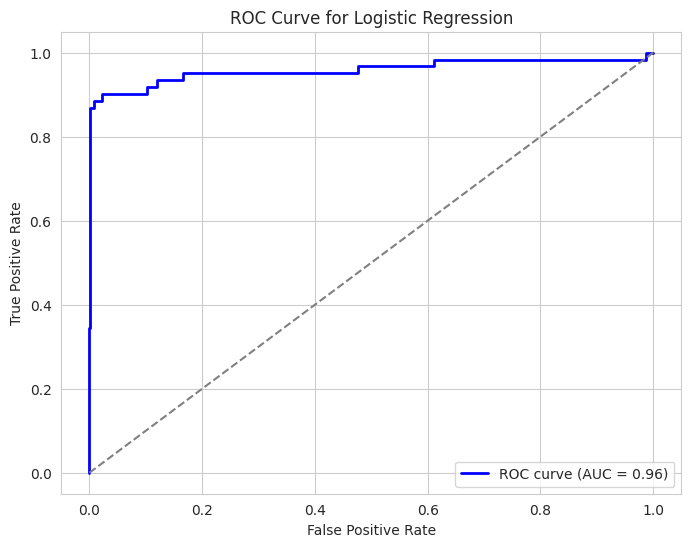

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

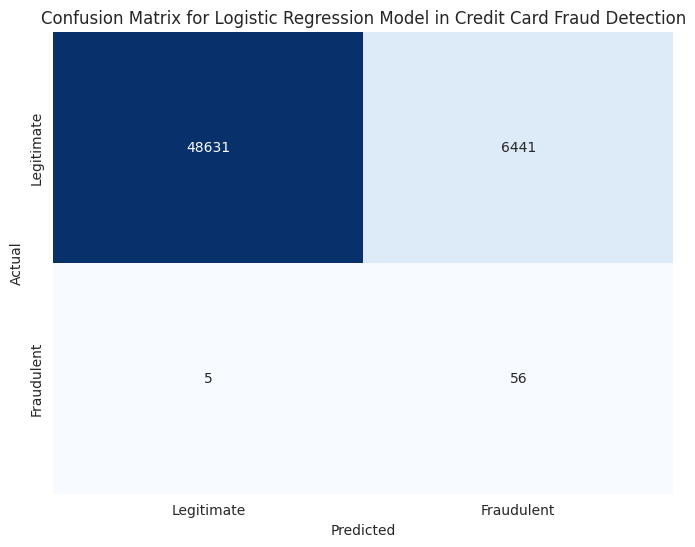

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.008619
1     Recall  0.918033
2   F1-Score  0.017078
3   Accuracy  0.883083
4        AUC  0.958891


In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train2_ADASYN_scaled, y_train2_ADASYN)
predict_DT = DT_model.predict(X_test2_scaled)
print(classification_report(y_test2, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test2)
print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test2, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     55072
           1       0.01      0.90      0.01        61

    accuracy                           0.87     55133
   macro avg       0.50      0.88      0.47     55133
weighted avg       1.00      0.87      0.93     55133

Decision Tree model accuracy is: 86.61%
AUC for Decision Tree Classifier: 0.88


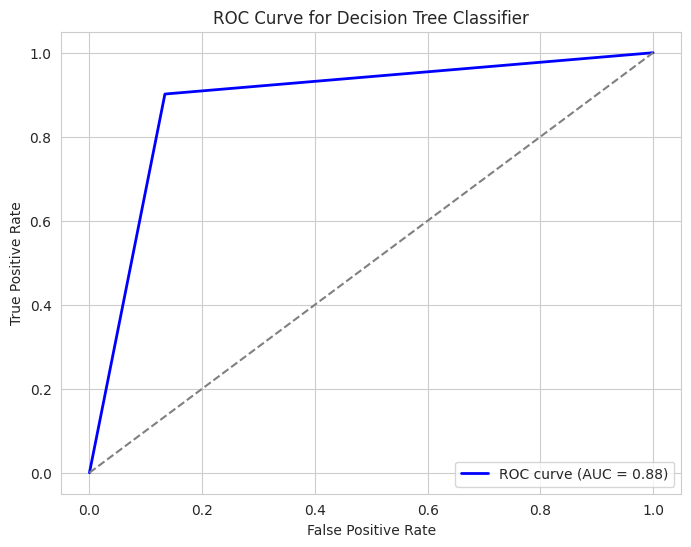

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

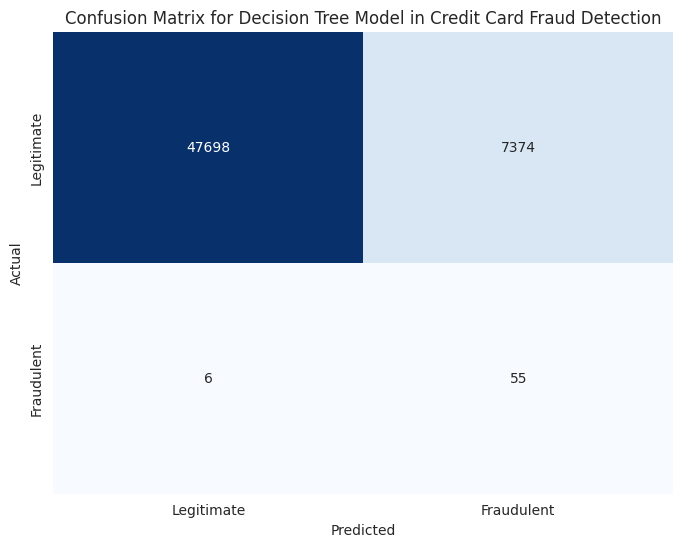

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.007403
1     Recall  0.901639
2   F1-Score  0.014686
3   Accuracy  0.866142
4        AUC  0.883871


In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train2_ADASYN_scaled, y_train2_ADASYN)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test2_scaled)

# Evaluate the model
print(classification_report(y_test2, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test2)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test2, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55072
           1       0.18      0.84      0.30        61

    accuracy                           1.00     55133
   macro avg       0.59      0.92      0.65     55133
weighted avg       1.00      1.00      1.00     55133

XGBoost model accuracy is: 99.57%
AUC for XGBoost classifier: 0.94


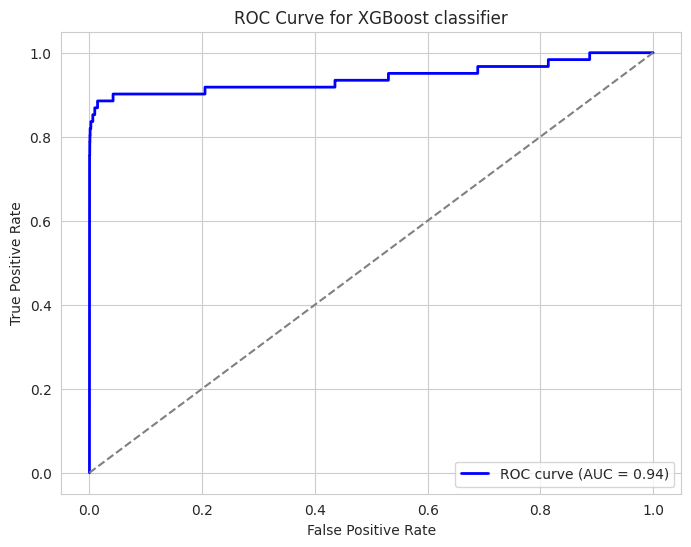

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

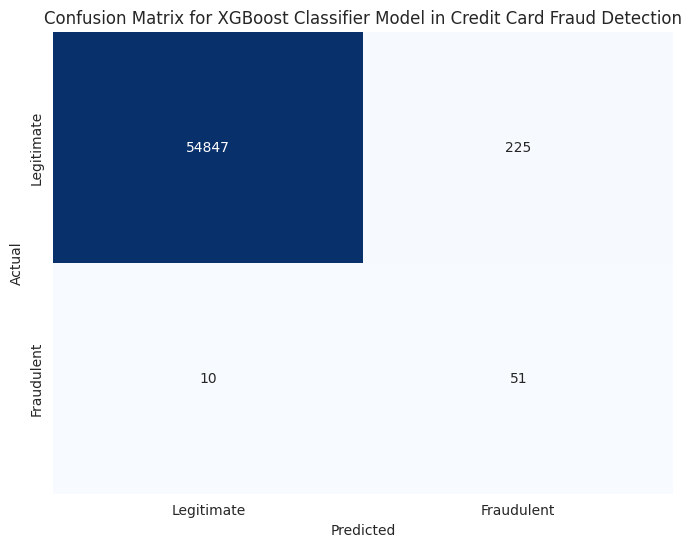

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.184783
1     Recall  0.836066
2   F1-Score  0.302671
3   Accuracy  0.995738
4        AUC  0.940334


In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train2_ADASYN_scaled, y_train2_ADASYN)

predict_RF = RF_model.predict(X_test2_scaled)

# Evaluate the model
print(classification_report(y_test2, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test2)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test2, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55072
           1       0.50      0.82      0.62        61

    accuracy                           1.00     55133
   macro avg       0.75      0.91      0.81     55133
weighted avg       1.00      1.00      1.00     55133

Random Forest model accuracy is: 99.89%
AUC for Random Forest classifier: 0.96


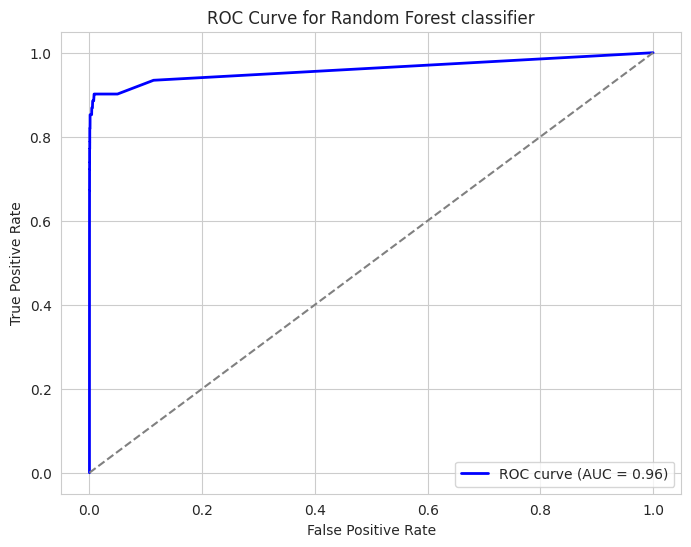

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

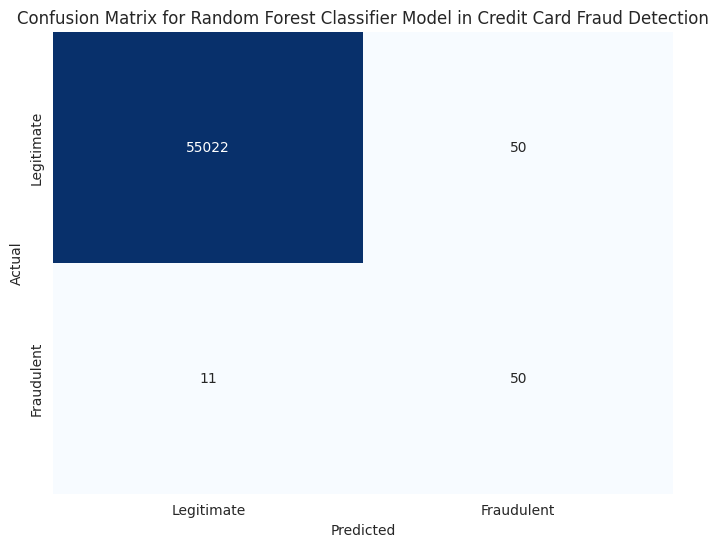

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.500000
1     Recall  0.819672
2   F1-Score  0.621118
3   Accuracy  0.998894
4        AUC  0.960418


In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train2_ADASYN_scaled, y_train2_ADASYN)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test2_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test2, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test2)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test2_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test2, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55072
           1       0.20      0.87      0.33        61

    accuracy                           1.00     55133
   macro avg       0.60      0.93      0.66     55133
weighted avg       1.00      1.00      1.00     55133

K-Nearest Neighbors (KNN) accuracy is: 99.61%
AUC for K-Nearest Neighbors (KNN): 0.94


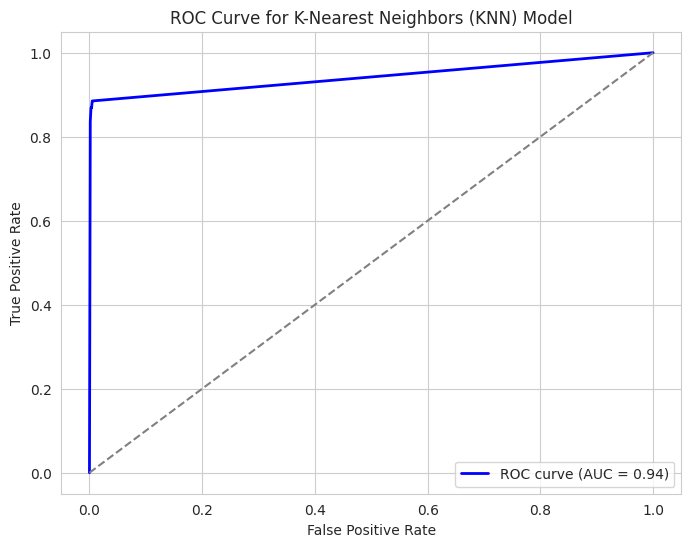

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

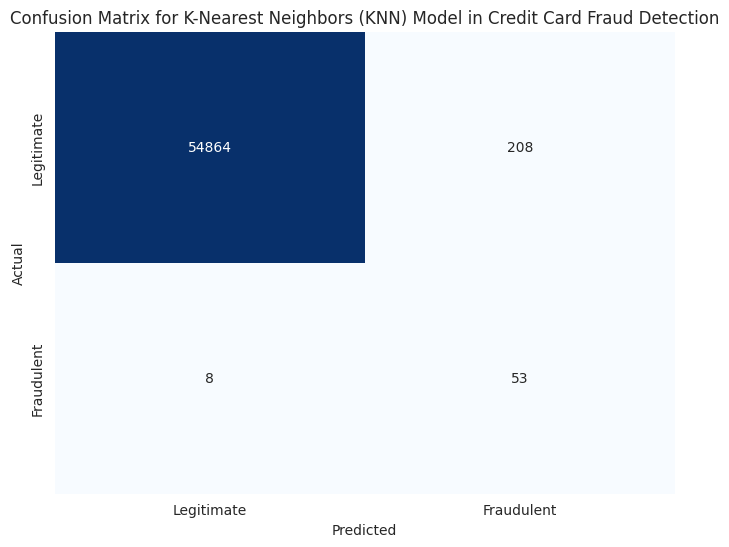

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test2, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test2, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.203065
1     Recall  0.868852
2   F1-Score  0.329193
3   Accuracy  0.996082
4        AUC  0.941549


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test2, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test2, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test2, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test2, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test2, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_adasyn_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 2 with ADASYN Oversampling:")
print(metrics_df_adasyn_oversampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 2 with ADASYN Oversampling:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.01   0.92     0.02     0.88  0.96
1          Decision Tree      0.01   0.90     0.01     0.87  0.88
2         XGB Classifier      0.18   0.84     0.30     1.00  0.94
3          Random Forest      0.50   0.82     0.62     1.00  0.96
4  KNeighbors Classifier      0.20   0.87     0.33     1.00  0.94


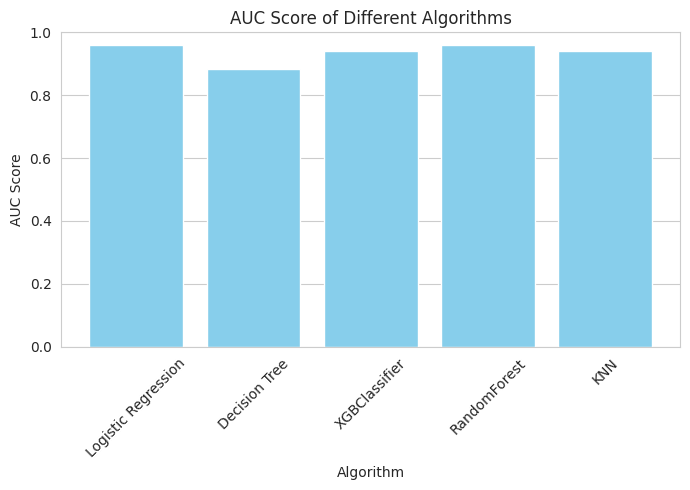

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()